In [1]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

Use sf_temps() for these exercises.

In [2]:
df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [5]:
df.index.min()

Timestamp('2010-01-01 00:00:00')

In [6]:
df.index.max()

Timestamp('2010-12-31 23:00:00')

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

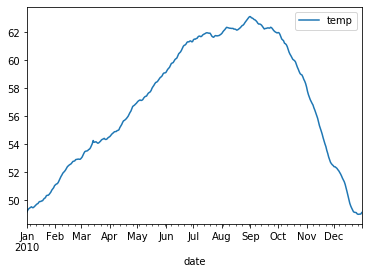

In [7]:
df.resample("D").mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

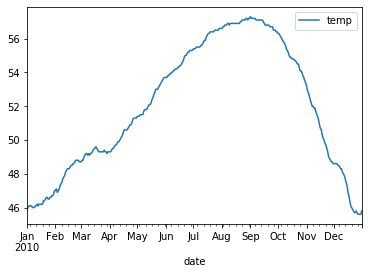

In [8]:
df.resample("D").min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

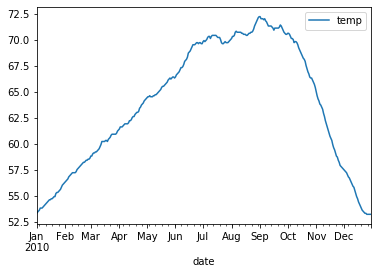

In [9]:
df.resample("D").max().plot()

4. Which month is the coldest, on average?

In [17]:
df_cold = df.resample("D").min().resample("M").min()
df_cold[df_cold.temp == min(df_cold.temp)]

,temp
date,
2010-12-31,45.6


In [15]:
#df.groupby([df.index.month]).min()
df.sort_values(by='temp', ascending=True).head(1)

,temp
date,
2010-12-30 06:00:00,45.6


5. Which month has the highest average temperature?

In [19]:
#df.resample("M").max()
#df.groupby([df.index.month]).max()
df.sort_values(by='temp', ascending=False).head(1)

,temp
date,
2010-08-31 14:00:00,72.2


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [22]:
df_resamp = df.resample("D").agg(['min', 'max'])
df_resamp['delta_temp'] = df_resamp.temp['max'] - df_resamp.temp['min']
cool = df_resamp.temp['max'] - df_resamp.temp['min']
cool.resample("M").max()
print("August")
#df_resamp.delta_temp.resample("M").max() - df_resamp.delta_temp.resample("M").min()

August


7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

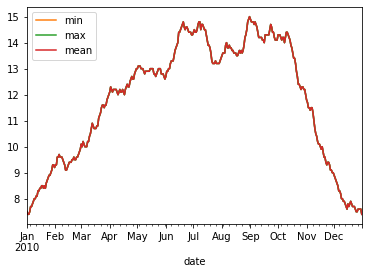

In [24]:
# fix this graph
ax = cool.plot()
cool.resample('D').agg(['min']).plot(ax=ax)
cool.resample('D').agg(['max']).plot(ax=ax)
cool.resample('D').agg(['mean']).plot(ax=ax)
#cool.asfreq()

Use the seattle dataset to answer the following questions:

In [25]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [26]:
df = df.set_index('date')

In [27]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


1. Which year and month combination has the highest amount of precipitation?

In [28]:
df.sort_values(by='precipitation', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-15,55.9,10.6,6.1,4.2,fog


2. Visualize the amount of monthly precipitation over time.

date
2012-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-02-29    AxesSubplot(0.125,0.125;0.775x0.755)
2012-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2013-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2013-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2013-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-08-31    AxesSubplot(

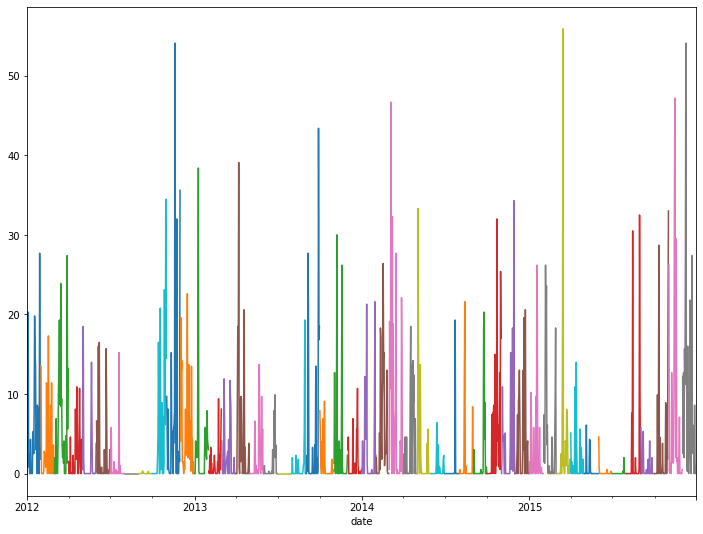

In [29]:
plt.figure(figsize=(12, 9))
df.resample("M").precipitation.plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

date
2012-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2014-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, Name: wind, dtype: object

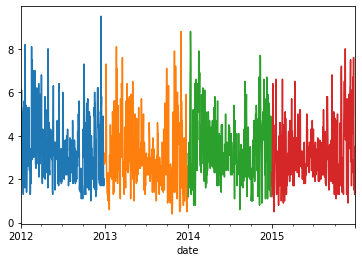

In [30]:
df.resample("Y").wind.plot()

4. Which year-month combination is the windiest?

In [31]:
df.sort_values(by='wind', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-17,2.0,8.3,1.7,9.5,rain


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [32]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [61]:
sun = df[df.weather == 'sun']
sun.resample("Y").count().sort_values(by='weather', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-12-31,211,211,211,211,211


6. In which month does it rain the most?

In [64]:
rain = df[df.weather == "rain"]
rain.resample("M").count().sort_values(by='weather', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-11-30,25,25,25,25,25


7. Which month has the most number of days with a non-zero amount of precipitation?

In [79]:
precip = df[df.precipitation != 0.0]
precip.resample("M").max()
#.resample("M").max().sort_values(by='precipitation', ascending=False)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,27.7,12.2,7.2,8.2,snow
2012-02-29,17.3,15.6,7.8,8.1,snow
2012-03-31,27.4,14.4,7.2,6.4,snow
2012-04-30,10.9,16.7,10.0,8.0,snow
2012-05-31,18.5,18.9,12.2,6.4,rain
2012-06-30,16.5,21.7,15.0,3.9,rain
2012-07-31,15.2,26.1,13.9,6.0,rain
2012-08-31,NaN,NaN,NaN,NaN,NaN
2012-09-30,0.3,20.0,13.9,5.0,rain


data.flights_20k()
1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

data.iowa_electricity()
1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
6. How would you control for increasing consumption over time when considering how much energy is coming from each source?
7. express each number as a % of the year's total

Use the sf_temps dataset
1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
3. Create pretty labels for time plots
4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar